In [2]:
from lib import *

In [10]:
from glob import glob
train_fns = sorted(glob('./siim/dicom-images-train/*/*/*.dcm'))
test_fns = sorted(glob('./siim/dicom-images-test/*/*/*.dcm'))

print(f'Number of train dicom files in folder: {len(train_fns)}')
print(f'Number of test dicom files in folder: {len(test_fns)}')

df = pd.read_csv('./siim/train-rle.csv')
print(df.shape)

print(f'Total no of unique images in csv file: { df["ImageId"].nunique()}')
print(f'Images with duplicate Encoded pixels, ie multiple annotations: {df[df.duplicated(subset=["ImageId"])].shape[0]}')

df.head()

Number of train dicom files in folder: 12089
Number of test dicom files in folder: 3205
(12954, 2)
Total no of unique images in csv file: 12047
Images with duplicate Encoded pixels, ie multiple annotations: 907


,ImageId,EncodedPixels
0,1.2.276.0.7230010.3.1.4.8323329.6904.151787520...,-1
1,1.2.276.0.7230010.3.1.4.8323329.13666.15178752...,557374 2 1015 8 1009 14 1002 20 997 26 990 32 ...
2,1.2.276.0.7230010.3.1.4.8323329.11028.15178752...,-1
3,1.2.276.0.7230010.3.1.4.8323329.10366.15178752...,514175 10 1008 29 994 30 993 32 991 33 990 34 ...
4,1.2.276.0.7230010.3.1.4.8323329.10016.15178752...,592184 33 976 58 956 73 941 88 926 102 917 109...


In [13]:
def rle2mask(rles, width, height):
    mask= np.zeros(width * height)
    for rle in rles:
        array = np.asarray([int(x) for x in rle.split()])
        starts = array[0::2]
        lengths = array[1::2]
        current_position = 0
        for index, start in enumerate(starts):
            current_position += start
            mask[current_position:current_position+lengths[index]] = 255
            current_position += lengths[index]
    return mask.reshape(width, height).T

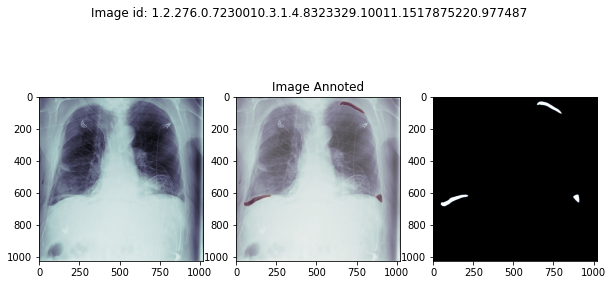

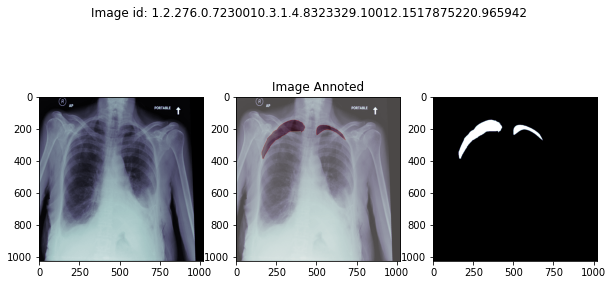

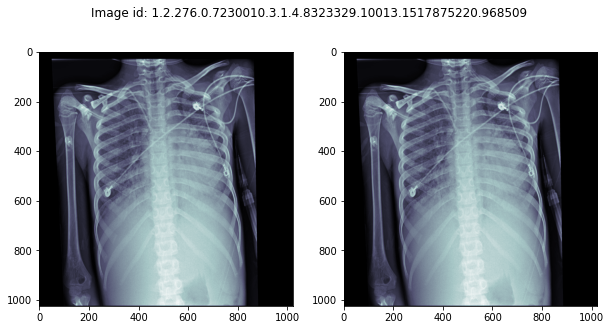

In [19]:
for file in train_fns[13:16]:
    data = pydicom.dcmread(file)
    image = data.pixel_array
    id_ = '.'.join(file.split('/')[-1].split('.')[:-1])
    rle = df[df['ImageId'] == str(id_)]['EncodedPixels'].values
    if rle[0] == '-1':
        fig, axes = plt.subplots(1, 2,figsize=(10,5))
        axes[0].imshow(image,cmap = 'bone')
        axes[1].imshow(image,cmap = 'bone')
        plt.suptitle(f'Image id: {id_}')
        plt.show()
    else:
        fig, axes = plt.subplots(1,3,figsize=(10,5))
        axes[0].imshow(image,cmap = 'bone')
        mask = rle2mask(rle,image.shape[0],image.shape[1])
        axes[1].imshow(image,cmap = 'bone')
        axes[1].imshow(mask, alpha = 0.3, cmap = 'Reds')
        axes[1].set_title('Image Annoted')
        axes[2].imshow(mask, cmap = 'bone')
        plt.suptitle(f'Image id: {id_}')
        plt.show()

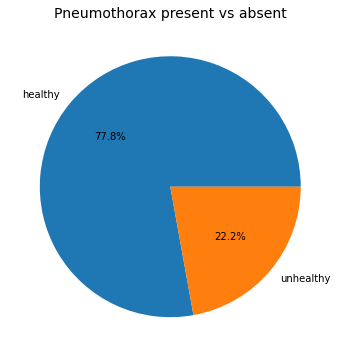

In [16]:
df_patients = pd.read_csv('preprocessing_data.csv')
tmp = df_patients['Pneumothorax'].value_counts()
df_patients['Pneumothorax'] = df_patients['Pneumothorax'].astype('int')
fig, ax = plt.subplots(figsize = [10,6])
ax.pie(tmp,labels =['healthy','unhealthy'],autopct="%.1f%%");
plt.title("Pneumothorax present vs absent", fontsize = 14);

In [8]:
input = torch.tensor([[-1, -2, 3], [4, 5, 6]])
max_val = (-input).clamp(min = 0)
max_val

tensor([[1, 2, 0],
        [0, 0, 0]])